<a href="https://colab.research.google.com/github/ValentineKarimi/Week8_Core_IP/blob/main/Hypothroid_Nairobi_Hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##**Defining the Question**
**a) Specifying the Question**

I have been recruited as an analyst to help provide the best model for prediction of hypothyroid patients given some data on the symptoms of the patient.

**b) Defining the Metric for Success**

Find the best model to best predict hypothyroid patients given certain symptoms 

**c) Understanding the context**

There are various classification models used in machine learning. Depending on the features , accuracy and MSE, a good classification model should be choosen, so it is easier to predict which patient has hypothyroid given certain symptoms 

**d) Recording the Experimental Design**

Reading  and Checking the Data


Exploratory Analysis


Tidying the Dataset

Carrying out various classification models
      
       a) Decision trees 

       b) Support Vector Machines 

Follow-up questions
    
    Optimization of the decision trees and svm 
**e) Data Relevance**

Dataset Columns

Age

Sex

on_thyroxine

query_on_thyroxine

on_antithyroid_medicationthyroid_surgery

query_hypothyroid

query_hyperthyroid

pregnant

sick

tumor

lithium

goitre

TSH_measured

TSH

T3_measured

T3

TT4_measured

TT4

##**Reading and checking data**

In [3]:
#Import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [4]:
#loading dataset
hypothyroid_data = pd.read_csv('/content/hypothyroid.csv')

In [5]:
# Previewing the top and bottom part of the dataset
display("hypothyroid_data preview")
display(hypothyroid_data.head(3))
display(hypothyroid_data.tail(3))

'hypothyroid_data preview'

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [6]:
# Check The number of records in dataset
print('Hypothyroid_data dataset has ',hypothyroid_data.shape[0],'records and ',hypothyroid_data.shape[1], 'rows' )

Hypothyroid_data dataset has  3163 records and  26 rows


In [7]:
# Check  information on datatypes of datasets 
display("Information on hypothyroid_data")
display(hypothyroid_data.info())
#Checking the columns in datasets
display("hypothyroid_data columns")
display(hypothyroid_data.columns)

'Information on hypothyroid_data'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

None

'hypothyroid_data columns'

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [8]:
# Checking for missing values 
display('hypothyroid_data dataset null values')
display(hypothyroid_data.isnull().sum())

'hypothyroid_data dataset null values'

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [9]:
#Replacing ? with 0 as it interferes with data 
hypothyroid_data =hypothyroid_data.replace('?',0)



In [10]:
#Convert the null in these columns to the mode 
col_name1 = ['T3','TSH', 'TT4', 'T4U', 'FTI', 'TBG'] 
for every in col_name1:
 hypothyroid_data[col_name1] =  hypothyroid_data[col_name1].astype(float)
 hypothyroid_data[col_name1].replace(0,hypothyroid_data[col_name1].mean())
 

 

In [11]:
#Convert the null in the age column to mean  
hypothyroid_data['age'] =  hypothyroid_data['age'].astype(float)
hypothyroid_data['age'] = hypothyroid_data['age'].replace(0,hypothyroid_data['age'].mean())
hypothyroid_data['age'] =  hypothyroid_data['age'].astype(int)

In [12]:
hypothyroid_data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n,0.0
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n,0.0
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n,0.0
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n,0.0
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n,0.0


##**Exploratory Analysis**

In [13]:
#Find unique values 
hypothyroid_data.nunique()

status                         2
age                           92
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          239
T3_measured                    2
T3                            69
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          158
FTI_measured                   2
FTI                          280
TBG_measured                   2
TBG                           52
dtype: int64

Exploratory Analysis on Categorical data 

In [14]:
 #Find the value count on categorical columns 
 col_names = ['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured',  'T3_measured', 'TT4_measured', 
       'T4U_measured', 'FTI_measured',  'TBG_measured'] 
 for col in col_names: 
  
   print(hypothyroid_data[col].value_counts())

F    2182
M     908
0      73
Name: sex, dtype: int64
f    2702
t     461
Name: on_thyroxine, dtype: int64
f    3108
t      55
Name: query_on_thyroxine, dtype: int64
f    3121
t      42
Name: on_antithyroid_medication, dtype: int64
f    3059
t     104
Name: thyroid_surgery, dtype: int64
f    2922
t     241
Name: query_hypothyroid, dtype: int64
f    2920
t     243
Name: query_hyperthyroid, dtype: int64
f    3100
t      63
Name: pregnant, dtype: int64
f    3064
t      99
Name: sick, dtype: int64
f    3123
t      40
Name: tumor, dtype: int64
f    3161
t       2
Name: lithium, dtype: int64
f    3064
t      99
Name: goitre, dtype: int64
y    2695
n     468
Name: TSH_measured, dtype: int64
y    2468
n     695
Name: T3_measured, dtype: int64
y    2914
n     249
Name: TT4_measured, dtype: int64
y    2915
n     248
Name: T4U_measured, dtype: int64
y    2916
n     247
Name: FTI_measured, dtype: int64
n    2903
y     260
Name: TBG_measured, dtype: int64


In [15]:
hypothyroid_data['sex'] = hypothyroid_data['sex'].replace(0,'Unknown')

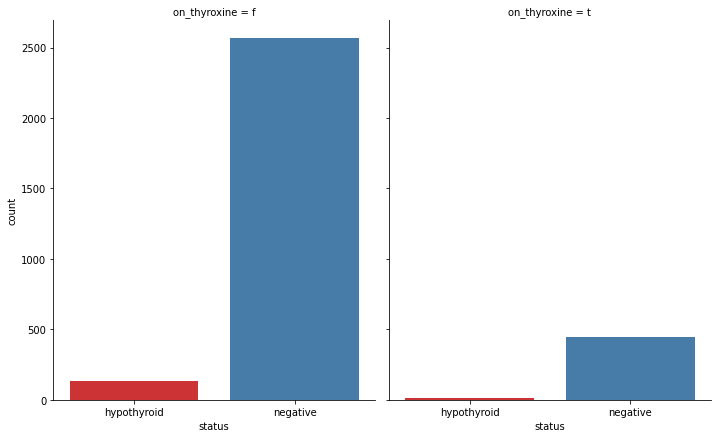

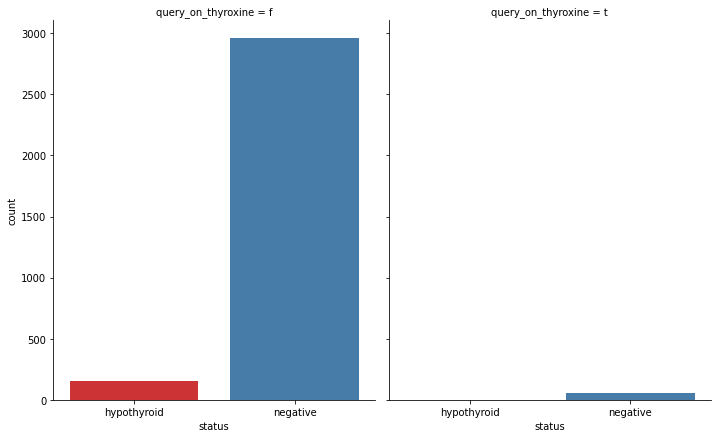

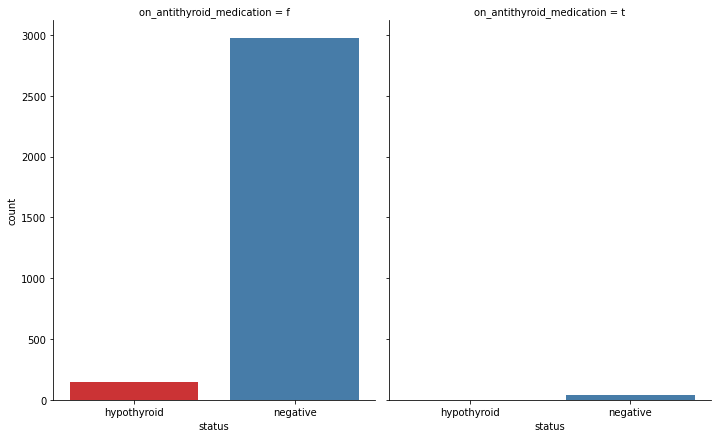

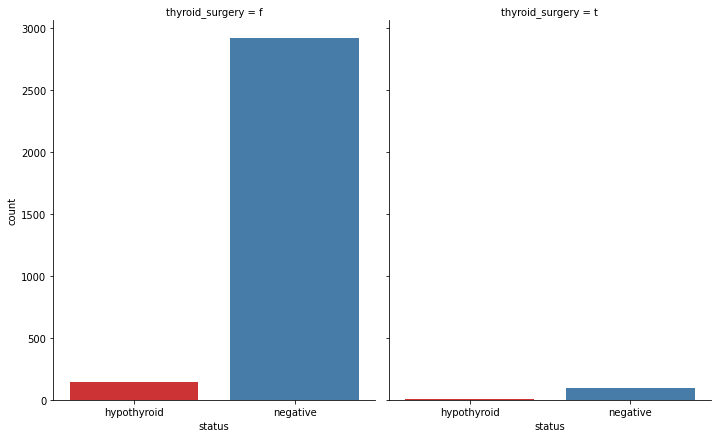

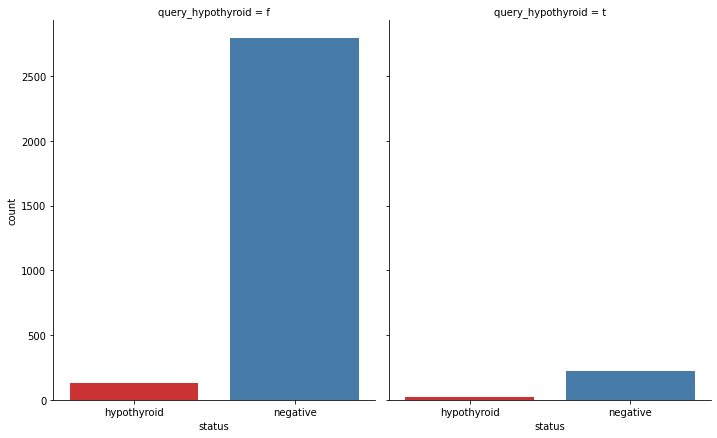

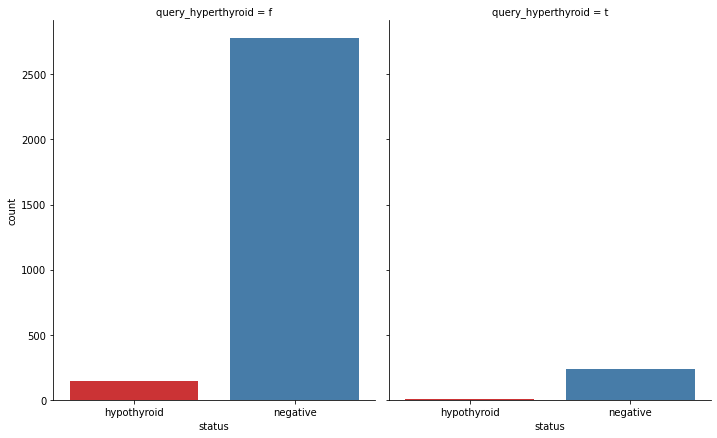

In [16]:
# Plotting bar charts to try and see the distribution of status 
#
import warnings
warnings.filterwarnings("ignore")
sns.catplot("status", col="on_thyroxine", col_wrap=4, data=hypothyroid_data, kind="count", height=6, aspect=.8, palette='Set1')
sns.catplot("status", col="query_on_thyroxine", col_wrap=4, data=hypothyroid_data, kind="count", height=6, aspect=.8, palette='Set1')
sns.catplot("status", col="on_antithyroid_medication", col_wrap=4, data=hypothyroid_data, kind="count", height=6, aspect=.8, palette='Set1')
sns.catplot("status", col="thyroid_surgery", col_wrap=4, data=hypothyroid_data, kind="count", height=6, aspect=.8, palette='Set1')
sns.catplot("status", col="query_hypothyroid", col_wrap=4, data=hypothyroid_data, kind="count", height=6, aspect=.8, palette='Set1')
sns.catplot("status", col="query_hyperthyroid", col_wrap=4, data=hypothyroid_data, kind="count", height=6, aspect=.8, palette='Set1')
plt.show()

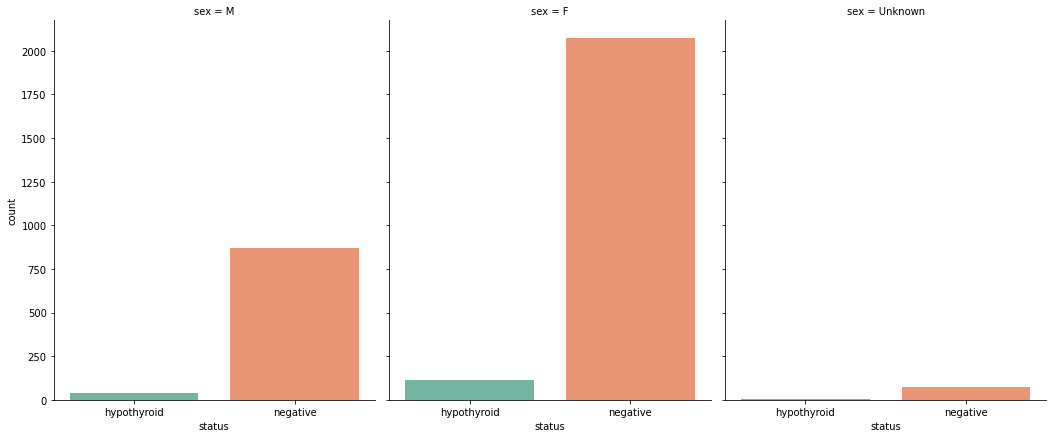

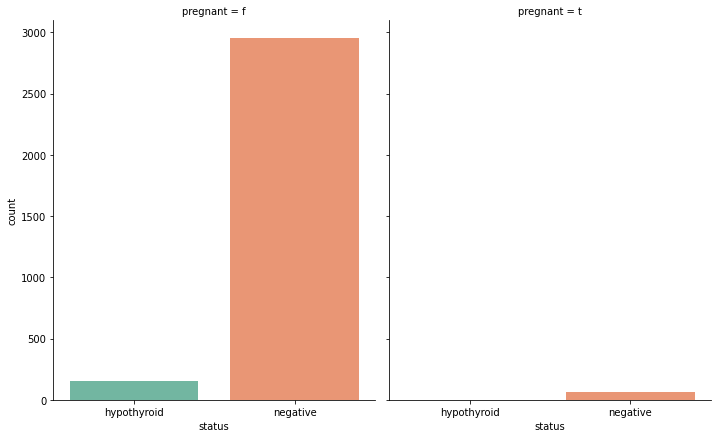

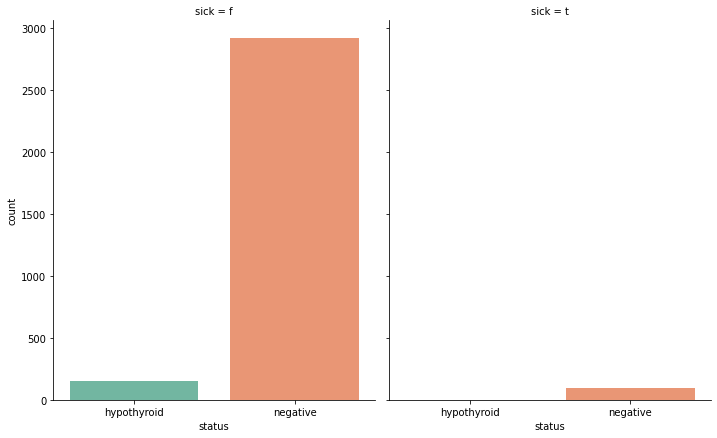

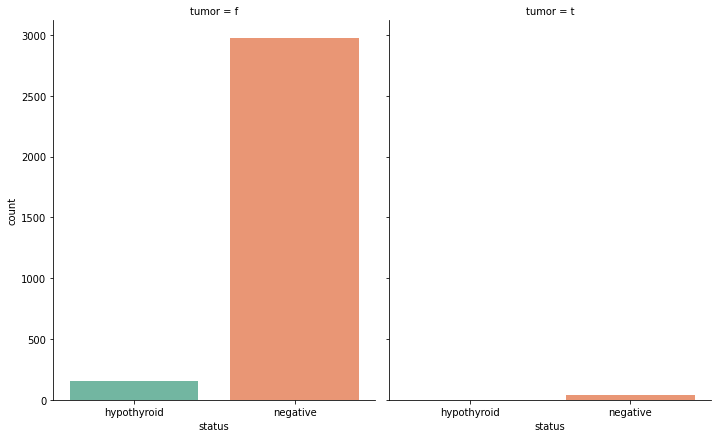

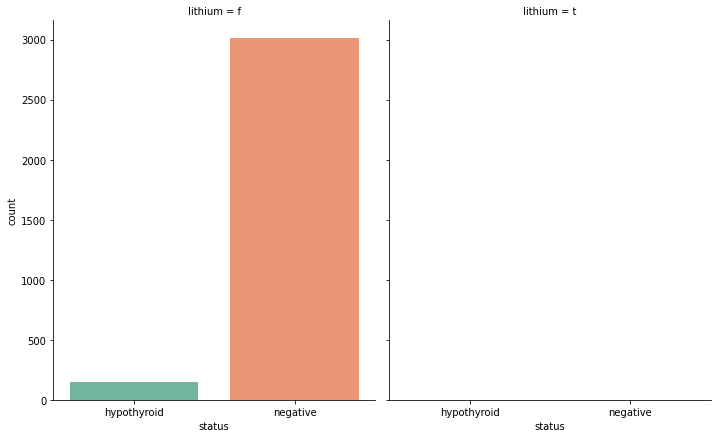

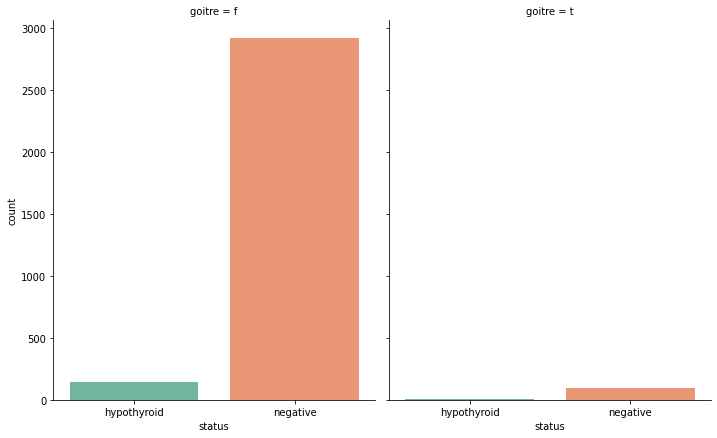

In [17]:
import warnings
warnings.filterwarnings("ignore")
 
sns.catplot("status", col="sex", col_wrap=4, data=hypothyroid_data, kind="count", height=6, aspect=.8, palette='Set2')
sns.catplot("status", col="pregnant", col_wrap=4, data=hypothyroid_data, kind="count", height=6, aspect=.8, palette='Set2')
sns.catplot("status", col="sick", col_wrap=4, data=hypothyroid_data, kind="count", height=6, aspect=.8, palette='Set2')
sns.catplot("status", col="tumor", col_wrap=4, data=hypothyroid_data, kind="count", height=6, aspect=.8, palette='Set2')
sns.catplot("status", col="lithium", col_wrap=4, data=hypothyroid_data, kind="count", height=6, aspect=.8, palette='Set2')
sns.catplot("status", col="goitre", col_wrap=4, data=hypothyroid_data, kind="count", height=6, aspect=.8, palette='Set2')
plt.show()

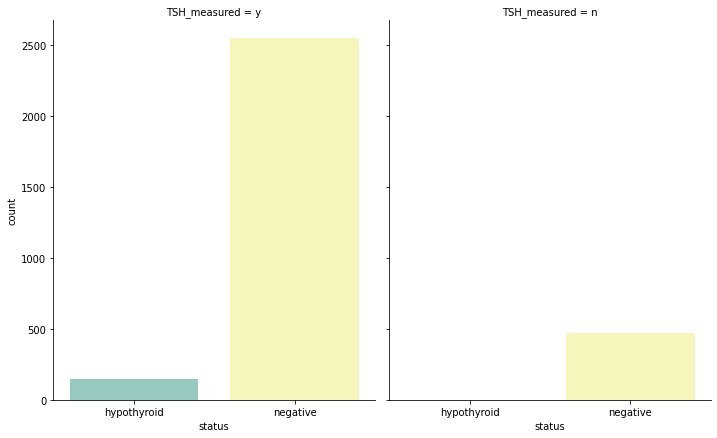

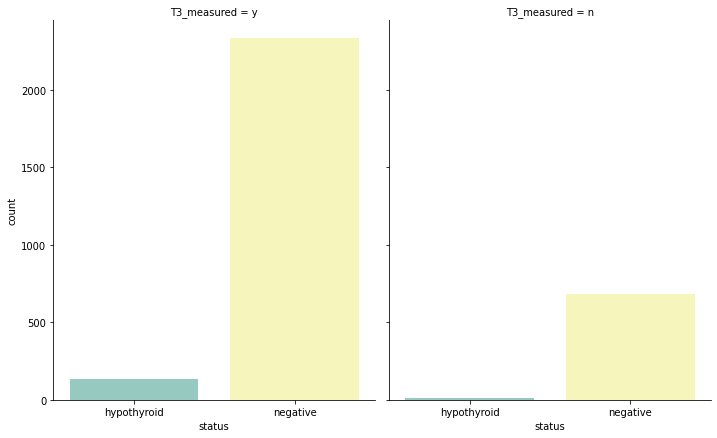

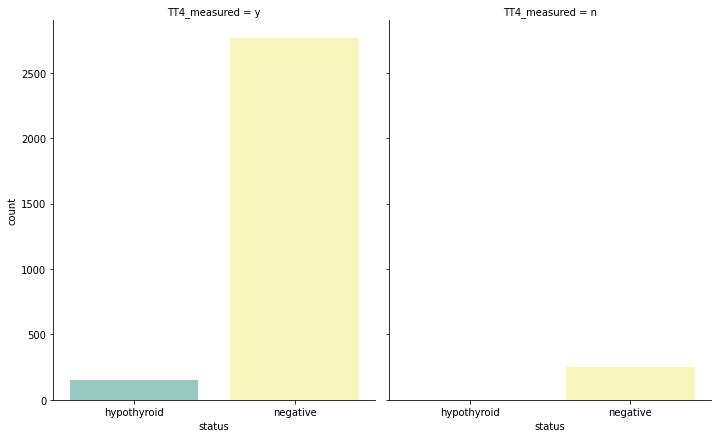

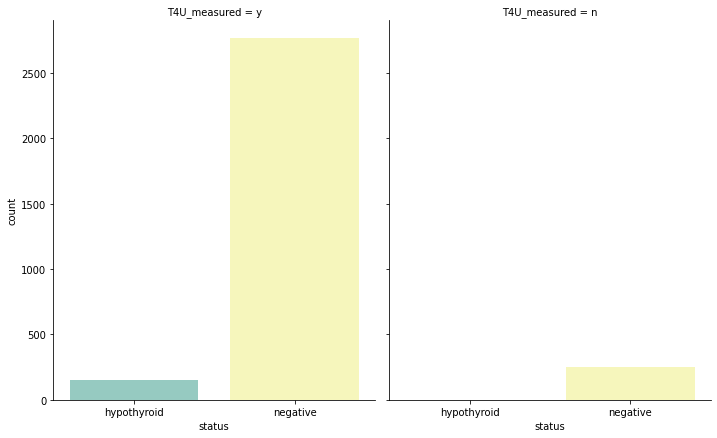

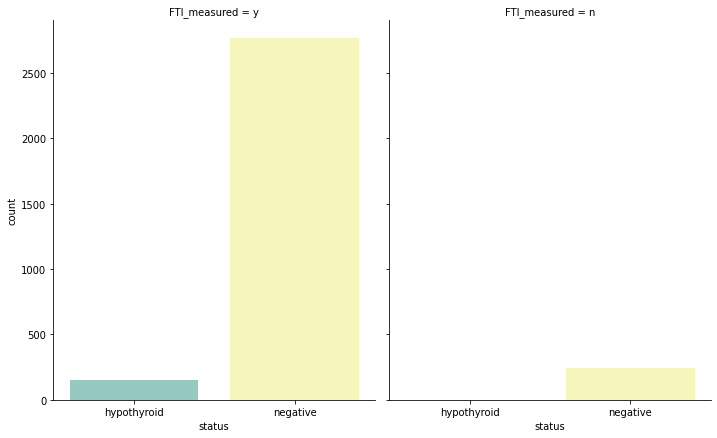

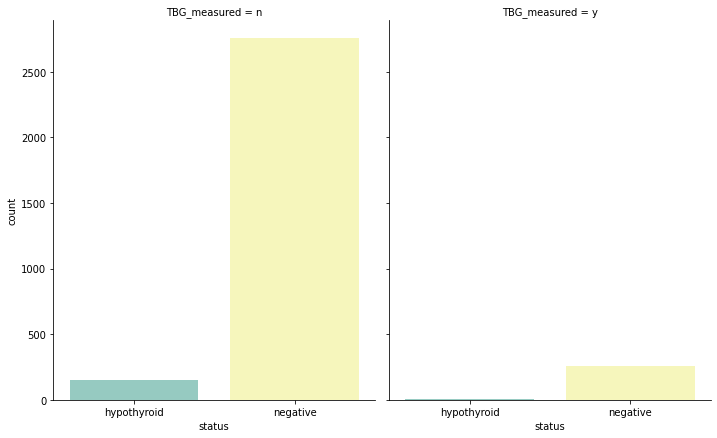

In [18]:
import warnings
warnings.filterwarnings("ignore")
 
sns.catplot("status", col="TSH_measured", col_wrap=4, data=hypothyroid_data, kind="count", height=6, aspect=.8, palette='Set3')
sns.catplot("status", col="T3_measured", col_wrap=4, data=hypothyroid_data, kind="count", height=6, aspect=.8, palette='Set3')
sns.catplot("status", col="TT4_measured", col_wrap=4, data=hypothyroid_data, kind="count", height=6, aspect=.8, palette='Set3')
sns.catplot("status", col="T4U_measured", col_wrap=4, data=hypothyroid_data, kind="count", height=6, aspect=.8, palette='Set3')
sns.catplot("status", col="FTI_measured", col_wrap=4, data=hypothyroid_data, kind="count", height=6, aspect=.8, palette='Set3')
sns.catplot("status", col="TBG_measured", col_wrap=4, data=hypothyroid_data, kind="count", height=6, aspect=.8, palette='Set3')
plt.show()

Exploratory Analysis on numerical data 

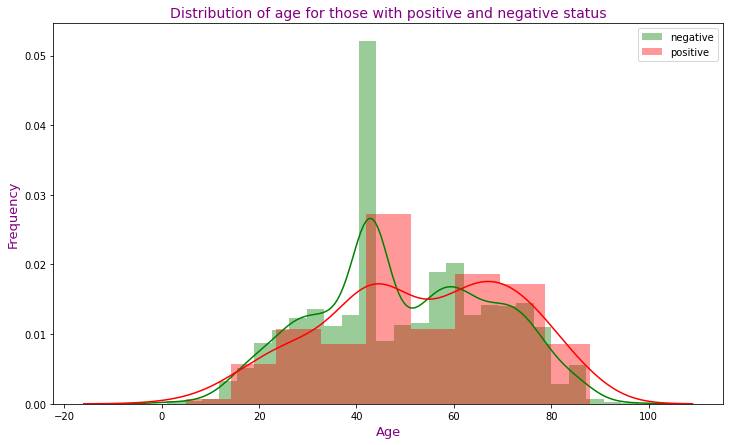

In [19]:

# Plotting histogram to show distribution of age per gender
# 
negative = hypothyroid_data.loc[hypothyroid_data.status=='negative', 'age']    # Selecting only negative datapoints in the age column
positive = hypothyroid_data.loc[hypothyroid_data.status=='hypothyroid', 'age']  # Selecting only positive datapoints in the age column



# Plotting the histograms
#
plt.figure(figsize=(12,7))
sns.distplot(negative, color="green", label="negative")
sns.distplot(positive, color="red", label="positive")
plt.title('Distribution of age for those with positive and negative status', fontsize = 14, color = 'purple')
plt.xlabel('Age', fontsize = 13, color = 'purple')
plt.ylabel('Frequency', fontsize = 13, color = 'purple')
plt.legend()
plt.show()

Pairplot

In [20]:
numerical= hypothyroid_data[['T3','TSH', 'TT4', 'T4U', 'FTI', 'TBG', 'status']]

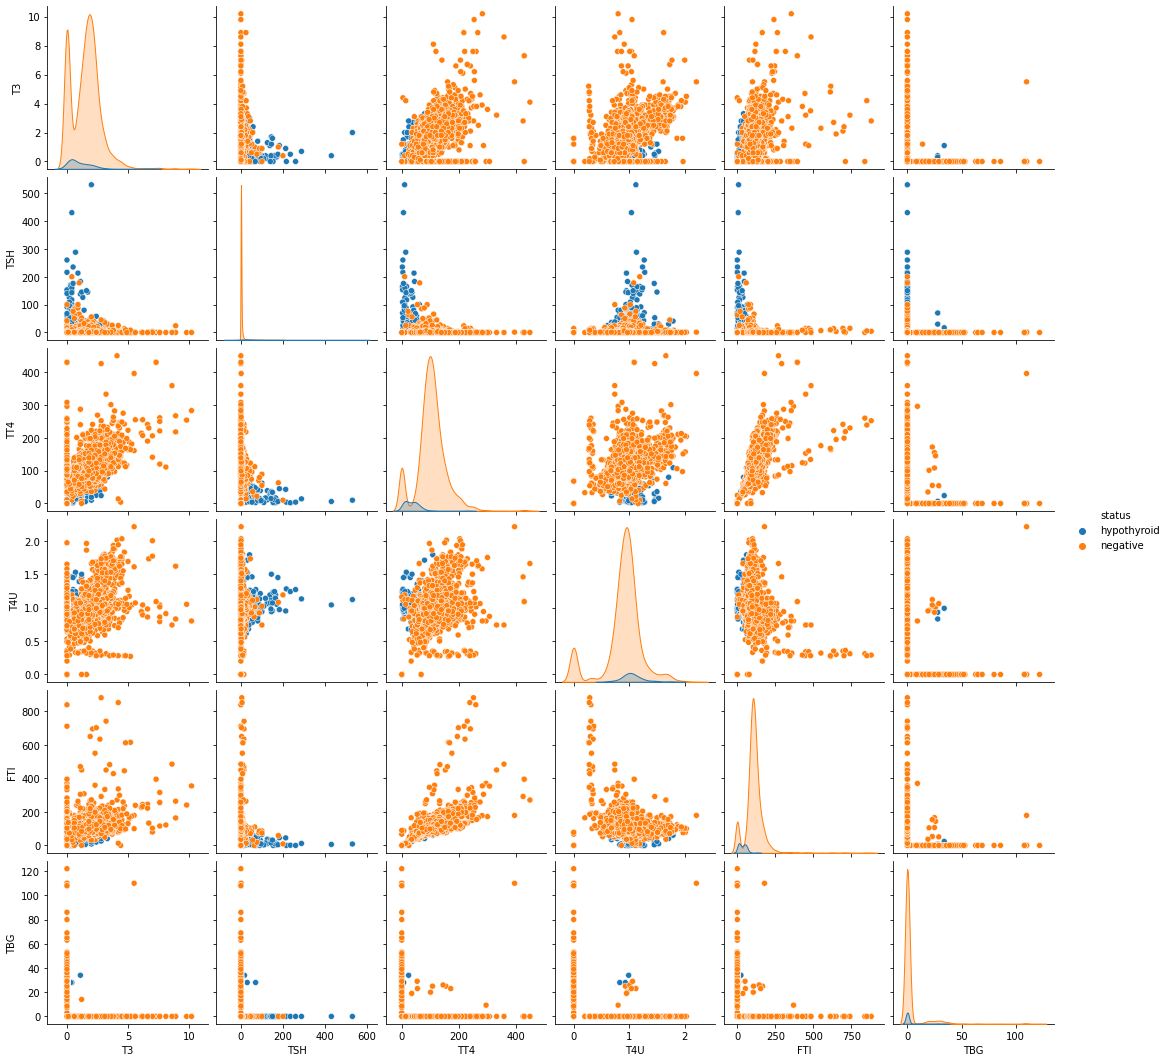

In [21]:
sns.pairplot(numerical, hue='status')
plt.show()


##**Decision trees**

Tidying the dataset

In [22]:
#label encode the categorical data 
hypothyroid_encoded = hypothyroid_data
label = LabelEncoder()
for col in col_names:
 #label encode the data     
    hypothyroid_encoded[col]=label.fit_transform(hypothyroid_data[col]) 



In [23]:
hypothyroid_encoded.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0,0,0.0
1,hypothyroid,15,0,1,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0,0,0.0
2,hypothyroid,24,1,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.2,1,4.0,1,1.00,1,0.0,0,0.0
3,hypothyroid,24,0,0,0,0,0,0,0,0,0,0,0,0,1,430.0,1,0.4,1,6.0,1,1.04,1,6.0,0,0.0
4,hypothyroid,77,1,0,0,0,0,0,0,0,0,0,0,0,1,7.3,1,1.2,1,57.0,1,1.28,1,44.0,0,0.0


In [24]:
hypothyroid_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3163 non-null   object 
 1   age                        3163 non-null   int64  
 2   sex                        3163 non-null   int64  
 3   on_thyroxine               3163 non-null   int64  
 4   query_on_thyroxine         3163 non-null   int64  
 5   on_antithyroid_medication  3163 non-null   int64  
 6   thyroid_surgery            3163 non-null   int64  
 7   query_hypothyroid          3163 non-null   int64  
 8   query_hyperthyroid         3163 non-null   int64  
 9   pregnant                   3163 non-null   int64  
 10  sick                       3163 non-null   int64  
 11  tumor                      3163 non-null   int64  
 12  lithium                    3163 non-null   int64  
 13  goitre                     3163 non-null   int64

In [25]:
#Checking for any duplicates
hypothyroid_encoded.duplicated().any()

True

In [26]:
# Checking for how many data points have been duplicated 
#
print(len(hypothyroid_encoded[hypothyroid_encoded.duplicated()]))

78


In [27]:
# Removing duplicates
# Keeping every first data point of the duplicated datapoints
#
hypothyroid_encoded.drop_duplicates(keep='first', inplace = True)

# Checking to confirm whether duplicates have been dropped
#
hypothyroid_encoded.duplicated().any()

False

In [28]:
hypothyroid_encoded.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000
mean,49.963371,0.337115,0.144571,0.017828,0.013614,0.033387,0.076175,0.076175,0.019773,0.031442,0.012966,0.000648,0.031118,0.852836,4.954399,0.779903,1.508071,0.922528,100.285219,0.922853,0.902143,0.923177,106.616823,0.081037,2.519806
std,18.080065,0.520463,0.351724,0.132348,0.115902,0.179675,0.265321,0.265321,0.139242,0.174539,0.113146,0.025458,0.173666,0.354326,22.279880,0.414379,1.179068,0.267382,51.772623,0.266869,0.339275,0.266354,65.467253,0.272937,10.128763
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.500000,1.000000,77.000000,1.000000,0.820000,1.000000,85.000000,0.000000,0.000000
50%,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.400000,1.000000,1.600000,1.000000,100.000000,1.000000,0.940000,1.000000,105.000000,0.000000,0.000000
75%,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.700000,1.000000,2.200000,1.000000,124.000000,1.000000,1.050000,1.000000,126.000000,0.000000,0.000000
max,98.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,1.000000,10.200000,1.000000,450.000000,1.000000,2.210000,1.000000,881.000000,1.000000,122.000000


Finding the y and X variables and splitting the data 

In [29]:
from sklearn.model_selection import train_test_split

# Split the independent and dependent variables
# We want to predict if someone has hypothyroid, so let's use the status column as our Y 
y = np.where(hypothyroid_encoded['status']=='negative',0,1)


test_features = hypothyroid_encoded.columns.to_list()
test_features.remove('status')


X = hypothyroid_encoded[test_features].values



In [30]:
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify= hypothyroid_encoded['status'])

**Ada boost**

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Note that adaboost needs a simple decision tree in its constructor. Again, tweak the max_depth and see how it influences the process

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                          n_estimators=100)

ada_boost = ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)



In [32]:
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_ada.flatten()})

comparison_frame.describe()
#accuracy_score(y_test, y_pred)

,Actual,Predicted
count,617.000000,617.000000
mean,0.045381,0.038898
std,0.208307,0.193508
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [33]:

# And now we assess the errors
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_ada))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_ada))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ada)))
#Getting the score
ada_boost.score(X_test, y_test)

Mean Absolute Error: 0.009724473257698542
Mean Squared Error: 0.009724473257698542
Root Mean Squared Error: 0.09861274389093198


0.9902755267423015

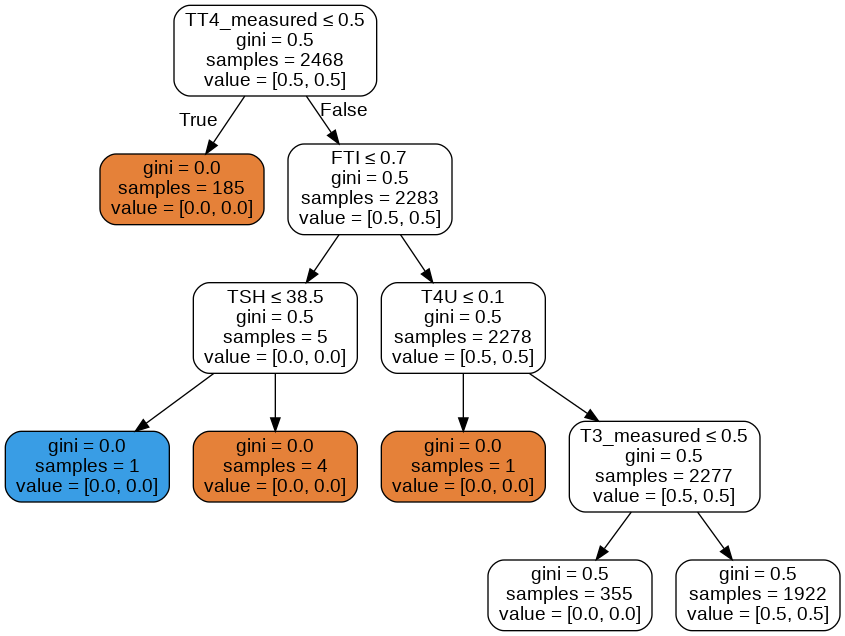

In [34]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data1 = StringIO()
# pick a specific tree from the forest
tree2 = ada_boost.estimators_[50]

export_graphviz(tree2, out_file=dot_data1,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data1.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())

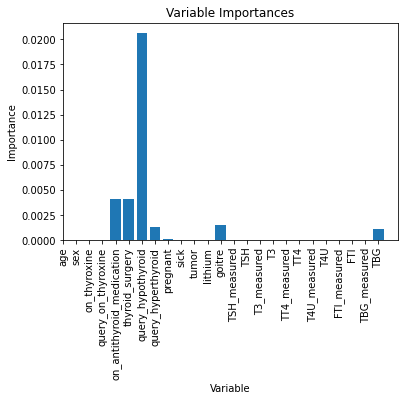

In [35]:
# Get numerical feature importances
importances = list(ada_boost.feature_importances_)

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

The ada Boost classifier has an accuracy score of 99.35% and uses most of the variables for prediction 

**Random Forest Classifier**

In [36]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest = RandomForestRegressor(n_estimators = 100, min_samples_split = 20, max_depth=4)
forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_forest = forest.predict(X_test)

In [37]:
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred_forest.flatten()})

comparison_frame.describe()
#accuracy_score(y_test, y_pred)

,Actual,Predicted
count,617.000000,617.000000
mean,0.045381,0.043612
std,0.208307,0.185129
min,0.000000,0.000070
25%,0.000000,0.000070
50%,0.000000,0.000070
75%,0.000000,0.000283
max,1.000000,0.971246


In [38]:
# And now we assess the errors
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_forest))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_forest))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_forest)))
#Getting the score
forest.score(X_test, y_test)

Mean Absolute Error: 0.010345891095588219
Mean Squared Error: 0.002852637398898496
Root Mean Squared Error: 0.053410087051965156


0.9341518506700661

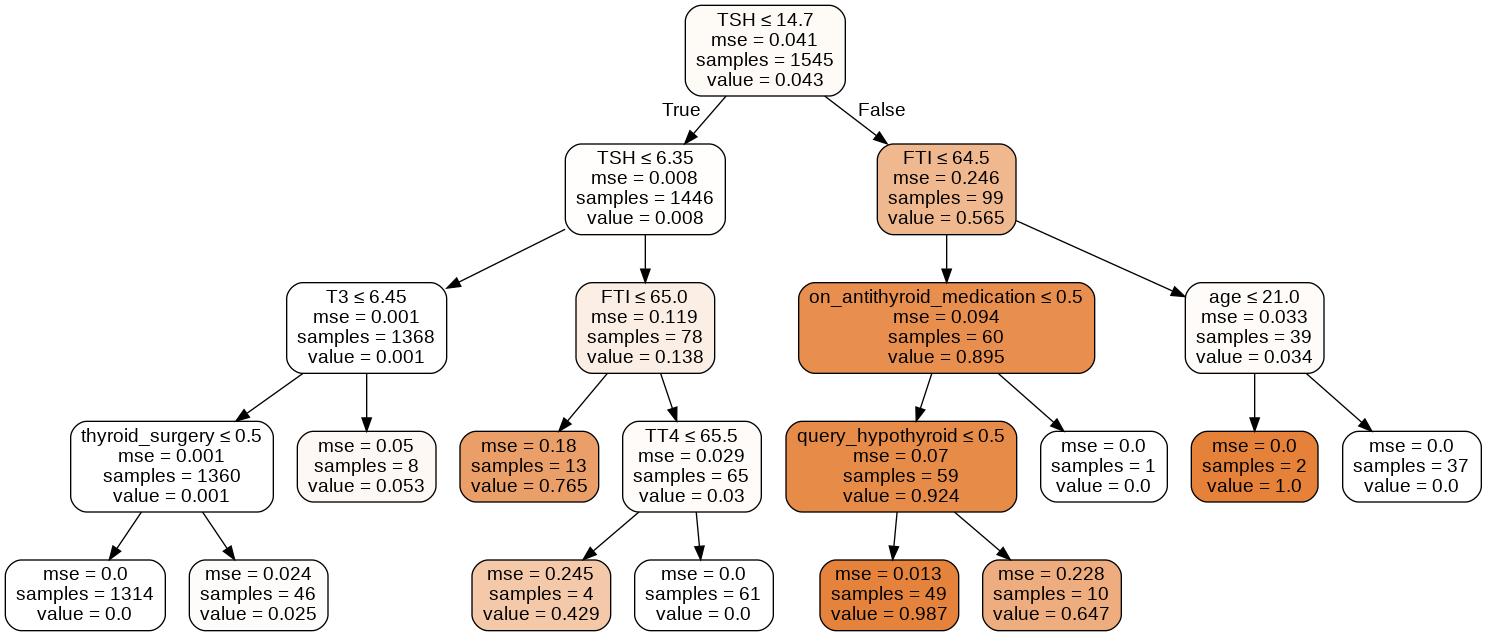

In [39]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('absenteism_forest.png')
Image(graph.create_png())

Get a graph to show importance of each variable 

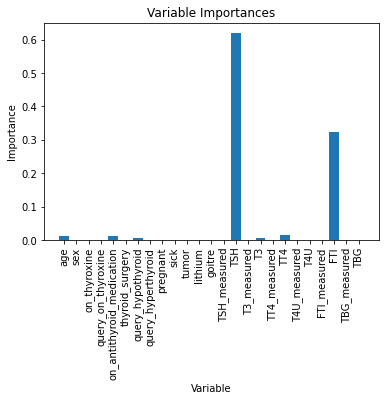

In [40]:
# Get numerical feature importances
importances = list(forest.feature_importances_)

# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

The accuracy score of random Forest is 93% and uses very few feature variables for predictions. 



##**Feature Importance**

Ada Boost

In [41]:
#Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
importance_df1 = pd.DataFrame({'feature': test_features, 'importance': np.round(ada_boost.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
importance_df1

,importance
feature,
query_hypothyroid,0.0206
thyroid_surgery,0.0041
on_antithyroid_medication,0.0041
goitre,0.0016
query_hyperthyroid,0.0013
TBG,0.0011
pregnant,0.0001
T3_measured,0.0001
TT4_measured,0.0000


**Dataframe for random_forest showing importance**

In [42]:
#Checking for the most important features that contribute most in predicting the target
# Creating a dataframe of features and their respective importances
#
importance_df = pd.DataFrame({'feature': test_features, 'importance': np.round(forest.feature_importances_, 4)}).set_index('feature').sort_values(by = 'importance', ascending = False)
importance_df

,importance
feature,
TSH,0.6195
FTI,0.3225
TT4,0.0160
on_antithyroid_medication,0.0130
age,0.0114
query_hypothyroid,0.0070
T3,0.0059
on_thyroxine,0.0016
T4U,0.0016


**Remodelling random forest using variables with high significance only**

In [43]:
test_feature1 = ['TSH','FTI']

In [44]:
# We should be able to use nearly all the other features, but for the sake of simplifying our visualization later, we only pick a few.
X1 = hypothyroid_encoded[test_feature1].values


In [45]:
# Train using 80% of the data.
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=5)

In [46]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth
forest1 = RandomForestRegressor(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=4)
forest1 = forest1.fit(X1_train, y1_train)

# Predict based on the model we've trained
y1_pred = forest1.predict(X1_test)

In [47]:
# Predict based on the model we've trained
y1_pred = forest1.predict(X1_test)

comparison_frame1 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_pred.flatten()})

comparison_frame1.describe()

,Actual,Predicted
count,617.000000,617.000000
mean,0.040519,0.036654
std,0.197332,0.172105
min,0.000000,0.000084
25%,0.000000,0.000114
50%,0.000000,0.000114
75%,0.000000,0.000879
max,1.000000,0.982310


In [48]:
# Get numerical feature importances
importances1 = list(forest1.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances1 = [(feature1, round(importance1, 2)) for feature1, importance1 in zip(test_feature1, importances1)]

print(feature_importances1) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances1];

[('TSH', 0.65), ('FTI', 0.35)]

Variable: TSH                  Importance: 0.65
Variable: FTI                  Importance: 0.35


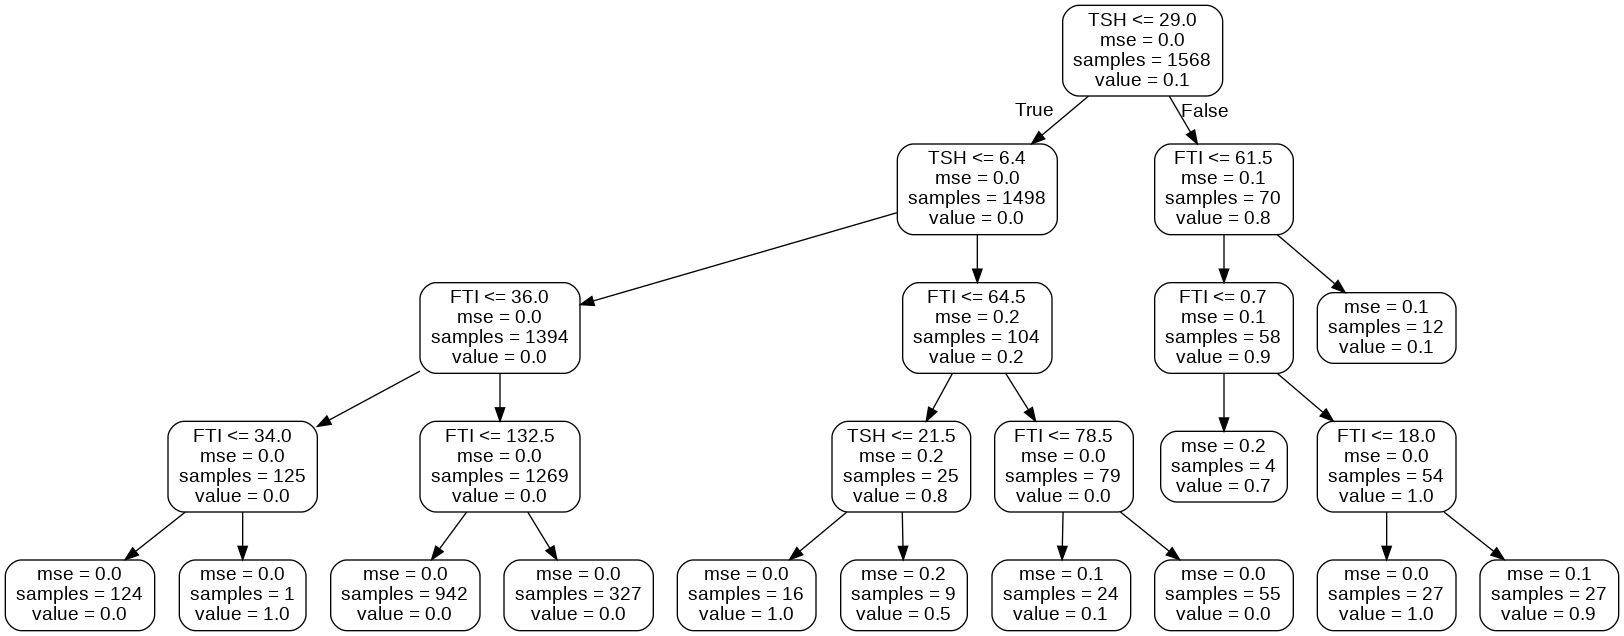

In [49]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree1 = forest1.estimators_[1]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree1 = forest1.estimators_[1]
# Export the image to a dot file
dot_data1 = StringIO()
export_graphviz(tree1, out_file = 'dot_data1', feature_names =test_feature1, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('dot_data1')
# Write graph to a png file
graph.write_png('tree.png')
Image(graph.create_png())

In [50]:
# And now we assess the errors
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
#Getting the score
forest1.score(X1_test, y1_test)

Mean Absolute Error: 0.020737950015142195
Mean Squared Error: 0.014999603282718857
Root Mean Squared Error: 0.12247286753693186


0.6141767585070974

After doing feauture importance TSH and FTI are the best variables for preficting hypothroid symptoms. The score after using the features that were important avoided overfitting and underfitting with an accuracy score of 61.41%


I woulkd hence prefer random forest classifier with TSH and FTI variables as the independent variables and status as the dependent variable 

#**Support Vector Machine**

In [51]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler

In [52]:
Svm_df = hypothyroid_encoded

In [53]:
# Removing the target column
X2 = Svm_df.drop('status', axis=1)
y2 = Svm_df['status']

# Applying the reduction algorithm: PCA
pca = PCA(n_components=2).fit(X2)
X2 = pca.transform(X2)
scaler = StandardScaler()
scaler.fit(X2)
X2.shape

(3085, 2)

In [54]:
#  Split the data into train and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0, stratify= Svm_df['status'])


**Let's now build the svm model**

In [55]:
poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

**Fitting the model using linear, polynomial and rbf**

In [56]:
linear.fit(X2_train,y2_train)
poly.fit(X2_train,y2_train)
rbf.fit(X2_train,y2_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [57]:
y_pred_linear = linear.predict(X2_test)
y_pred_poly = poly.predict(X2_test)
y_pred_rbf = rbf.predict(X2_test)

Model Evaluation 

In [58]:
# Model Evaluation for linear
print( accuracy_score(y2_test, y_pred_linear))
print(confusion_matrix(y2_test, y_pred_linear))

0.9546191247974068
[[  0  28]
 [  0 589]]


In [59]:
# Model Evaluation forpolynomial
print( accuracy_score(y2_test, y_pred_poly))
print(confusion_matrix(y2_test, y_pred_poly))

0.9546191247974068
[[  0  28]
 [  0 589]]


In [60]:
# Model Evaluation for rbf 
print( accuracy_score(y2_test, y_pred_rbf))
print(confusion_matrix(y2_test, y_pred_rbf))

0.9789303079416531
[[ 16  12]
 [  1 588]]


The kernel with the best predictionis rbf 

#**Challenging the  answer**

**Optimization**

Ada Boost

In [61]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": range(1, 10, 100)
             }


DTC = DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced", max_depth=4)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'roc_auc')

In [62]:
grid_search_ABC.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight='balanced',
                                                                                criterion='gini',
                                                                                max_depth=4,
                                                                                max_features='auto',
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_l

In [63]:
grid_search_ABC.best_score_

0.9548051828168141

The best parameters to be used fo ADA Boost will be 
(ccp_alpha=0.0,
                                                                                class_weight='balanced',
                                                                                criterion='gini',
                                                                                max_depth=4,
                                                                                max_features='auto',
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                                min_samples_split=2,
                                                                                min_weight_fraction_leaf=0.0,
                                                                                p...eprecated',
                                                                                random_state=11,
                                                                                splitter='best'),
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'base_estimator__criterion': ['gini', 'entropy'],
                         'base_estimator__splitter': ['best', 'random'],
                         'n_estimators': range(1, 10, 100)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

Random Forest Classifier 

In [64]:
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV

In [65]:
rf_clf = RandomForestClassifier(random_state=42)


In [66]:
params_grid = {"max_depth": [3, None],
               "min_samples_split": [2, 3, 10],
               "min_samples_leaf": [1, 3, 10],
               "bootstrap": [True, False],
               "criterion": ['gini', 'entropy']}

In [67]:
grid_search = GridSearchCV(rf_clf, params_grid,
                           n_jobs=-1, cv=5,
                           verbose=1, scoring='accuracy')

In [68]:
grid_search.fit(X1_train, y1_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:   52.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [69]:
grid_search.best_score_

0.9947294511829583

In [70]:
grid_search.best_estimator_.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

The best parameters for random Forest classifier is 

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

Support Vector Machine optimization using RBF 

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.preprocessing import StandardScaler


# #############################################################################
# Train classifiers
#
#Optimization of rbf for the best score and params 

C_range = np.logspace(1, 10, 10)
gamma_range = np.logspace(-5, 1, 6)
param_grid = dict(gamma=gamma_range, C=C_range)
svc = SVC( kernel='rbf')
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(svc, param_grid=param_grid, cv=cv)
grid.fit(X2, y2)

print((grid.best_params_, grid.best_score_))